In [69]:
# Importing libraries and defining the directory where our data is located
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import centroid, fcluster

In [70]:
# Importing dataframes
sous_alim = pd.read_csv('fr_sousalimentation.csv')
animaux = pd.read_csv('fr_animaux.csv')
population = pd.read_csv('fr_population.csv')
vegetaux = pd.read_csv('fr_vegetaux.csv')
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [71]:
population.Zone.nunique()

175

In [72]:
### head(), info(), and describe() -> methods used every time a dataframe is loaded
### example

In [73]:
aide_alimentaire.head()
aide_alimentaire.info()
aide_alimentaire.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


In [74]:
### Data cleaning and conversion of data to numeric
### Removing duplicate entries for China in the following dataframes
sous_alim = sous_alim.loc[sous_alim['Zone'] != 'Chine']
animaux = animaux.loc[animaux['Zone'] != 'Chine']
population = population.loc[population['Zone'] != 'Chine']
vegetaux = vegetaux.loc[vegetaux['Zone'] != 'Chine']
### Converting the 'valeur' column to numeric and replacing values <0.1 with 0.1
sous_alim['Valeur'] = sous_alim['Valeur'].replace('<0.1', 0)
sous_alim.Valeur = sous_alim.Valeur.astype('float32')
### Filtering the dataframes for the year 2013
sous_alim = sous_alim[sous_alim['Année'] == '2012-2014']
aide_alimentaire = aide_alimentaire[aide_alimentaire['Année'] == 2013]

In [77]:
### la proportion de personnes en sous alimentation en 2013 ?
### nombre de personnes en sous nutrition (sous_alim['Valeur'].sum() ->Valeur) / nombre de personnes dans le monde(population.Valeur.sum() ->Valeur) * 100 
print(f"The proportion of undernourished people in 2013: {round(sous_alim.Valeur.sum()*1000/population.Valeur.sum()*100,1)}%")

The proportion of undernourished people in 2013: 10.6%


In [61]:
### Nbre de personnes pouvant être nourris en 2013 ? 
### on utilise la data dispo aim en kcal d'origine animale (animaux) et végétales (vegetaux) pour
### nombre de kcal de référence pour un humain : 2500
### formule : nbre de kcal disponibles (animaux + vegetaux) / 2500 
### avons nous la chine en doublons ? est ce que la colonne valeur est en numérique ? 

In [78]:
### formule : nbre de kcal disponibles (animaux + vegetaux) / nbr de pays  / 2500 
### nbre de kcal disponibles (animaux + vegetaux) / nbr de pays -> moyenne disponible par pays

nbr_kcal_animaux_monde = animaux.loc[animaux['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)'].Valeur.sum()
nbr_kcal_vegetaux_monde = vegetaux.loc[vegetaux['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)'].Valeur.sum()
nb_kcal_monde = nbr_kcal_animaux_monde + nbr_kcal_vegetaux_monde 
nb_pays = population['Zone'].nunique()
pop_totale = population['Valeur'].sum()*1000
besoin_nrj = 2000
print(round(((nb_kcal_monde/nb_pays)/(besoin_nrj))*pop_totale,0),'personnes qui pourraient être nourries.') 




9961980426.0 personnes qui pourraient être nourries.


In [18]:
#nb_kcal_monde/nb_pays

In [19]:
#nbr_kcal_animaux_pays = animaux.loc[animaux['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)'].groupby('Zone').sum()['Valeur']
#nbr_kcal_vegetaux_pays = vegetaux.loc[vegetaux['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)'].groupby('Zone').sum()['Valeur']
#nb_kcal_pays_monde = nbr_kcal_animaux_pays + nbr_kcal_vegetaux_pays


In [20]:
#nb_kcal_pays_monde

In [21]:
#nb_kcal_pays_monde.describe()

In [22]:
### idem por les végétaux
print(round(((nbr_kcal_vegetaux_monde/nb_pays)/(besoin_nrj))*pop_totale,0),'personnes qui pourraient être nourries.') 

8018412807.0 personnes qui pourraient être nourries.


In [23]:
#L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à
#l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour
#l'alimentation humaine 
# exemple équation balance alimentaire sur le df animaux
# disponibilite_intérieure  = production + importations - exportations +- variation de stock (balance alimentaire)
# 1366750.00 = 1372054.00 + 234667.00 - 243658.00 + 3720.00
# disponibilite_intérieure = Nourriture + Aliments pour animaux + Semences + Traitement + Pertes + Autres utilisations (non alimentaire)
# 1366750.00 = 1183716.00 + 107626.00 +  5672.00 + 1010.00 + 23930.00 + 46252.00


In [24]:
### calcul permettant d'avoir l'ensemble des indicateurs quelque soit la source d'alimentation
data_ratio = animaux.groupby('Élément').sum()['Valeur'] + vegetaux.groupby('Élément').sum()['Valeur']

In [25]:
data_ratio

Élément
Aliments pour animaux                                             1304245.00
Autres utilisations (non alimentaire)                              865023.00
Disponibilité alimentaire (Kcal/personne/jour)                     495442.00
Disponibilité alimentaire en quantité (kg/personne/an)             122201.94
Disponibilité de matière grasse en quantité (g/personne/jour)       15133.01
Disponibilité de protéines en quantité (g/personne/jour)            14146.13
Disponibilité intérieure                                          9848994.00
Exportations - Quantité                                           1352158.00
Importations - Quantité                                           1296053.00
Nourriture                                                        4876258.00
Pertes                                                             453698.00
Production                                                       10009680.00
Semences                                                           1

In [26]:
print(round(data_ratio['Aliments pour animaux']/data_ratio['Disponibilité intérieure']*100,1),"%")

13.2 %


In [27]:
print(round(data_ratio['Pertes']/data_ratio['Disponibilité intérieure']*100,1),"%")

4.6 %


In [28]:
print(round(data_ratio['Nourriture']/data_ratio['Disponibilité intérieure']*100,1),"%")

49.5 %


In [29]:
print(round(data_ratio['Autres utilisations (non alimentaire)']/data_ratio['Disponibilité intérieure']*100,1),"%")

8.8 %


In [30]:
#Caractériser les pays en vous basant sur les informations calculées précédemment, nous
#devrions être en mesure de visualiser les pays pour lesquels la proportion de personnes sous
#alimentées est la plus forte et ceux ayant le moins de disponibilité par habitant ;


In [31]:
### création dataframe avec quelques indicateurs
### première features de calculées Population et dispo_kcal
### on commence par calculer les dispos kcal par pays
nbr_kcal_animaux_pays = animaux.loc[animaux['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)'].groupby('Zone').sum()['Valeur']
nbr_kcal_vegetaux_pays = vegetaux.loc[vegetaux['Élément'] == 'Disponibilité alimentaire (Kcal/personne/jour)'].groupby('Zone').sum()['Valeur']
nb_kcal_pays_monde = nbr_kcal_animaux_pays + nbr_kcal_vegetaux_pays
### première jointure 
### .merge = jointure équivalent rechecheV
df_pays = population[['Zone','Valeur']].merge(nb_kcal_pays_monde.reset_index(), on='Zone',how = 'left')
df_pays.rename(columns={"Valeur_x":"Population", "Valeur_y":"Dispo kcal"}, inplace=True)

In [32]:
### deuxième jointure on récupère le nombre de personnes sous alimentées
df_pays = df_pays.merge(sous_alim[['Zone','Valeur']], on='Zone', how='left')
df_pays.rename(columns={"Valeur":"Sous Alim"}, inplace=True)
### ajout feature proportion de personnes sous alimentées
df_pays['Prop. sous alim'] = df_pays['Sous Alim']*1000/df_pays['Population']


In [33]:
### troisième jointure on récupère l'aide alimentaire par pays
### calcul aide alimentaire
aide_alim_pays = aide_alimentaire.groupby('Pays bénéficiaire').sum()['Valeur'].reset_index()
df_pays = df_pays.merge(aide_alim_pays, left_on='Zone', right_on ='Pays bénéficiaire', how='left')
df_pays.rename(columns={"Valeur":"Aide Alim"}, inplace=True)
### calcul aide alimentaire par habitant 
df_pays['Aide alim /hab'] = df_pays['Aide Alim']/df_pays['Population']

In [34]:
df_pays

,Zone,Population,Dispo kcal,Sous Alim,Prop. sous alim,Pays bénéficiaire,Aide Alim,Aide alim /hab
0,Afghanistan,30552,2087.0,7.9,0.258576,Afghanistan,128238.0,4.197368
1,Afrique du Sud,52776,3020.0,2.6,0.049265,NaN,NaN,NaN
2,Albanie,3173,3188.0,0.2,0.063032,NaN,NaN,NaN
3,Algérie,39208,3293.0,1.7,0.043358,Algérie,35234.0,0.898643
4,Allemagne,82727,3503.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
169,Venezuela (République bolivarienne du),30405,2633.0,1.9,0.062490,NaN,NaN,NaN
170,Viet Nam,91680,2744.0,10.4,0.113438,NaN,NaN,NaN
171,Yémen,24407,2217.0,7.2,0.294997,Yémen,264764.0,10.847872
172,Zambie,14539,1924.0,7.0,0.481464,Zambie,328.0,0.022560


In [35]:
### liste des pays avec la plus forte proportion de personnes en sous alimentation

In [36]:
df_pays.nlargest(10, 'Prop. sous alim')

,Zone,Population,Dispo kcal,Sous Alim,Prop. sous alim,Pays bénéficiaire,Aide Alim,Aide alim /hab
70,Haïti,10317,2089.0,5.2,0.504022,Haïti,61214.0,5.933314
172,Zambie,14539,1924.0,7.0,0.481464,Zambie,328.0,0.022560
173,Zimbabwe,14150,2113.0,6.6,0.466431,Zimbabwe,21252.0,1.501908
131,République centrafricaine,4616,1879.0,2.0,0.433276,République centrafricaine,17156.0,3.716638
136,République populaire démocratique de Corée,24895,2093.0,10.6,0.425788,République populaire démocratique de Corée,71324.0,2.864993
39,Congo,4448,2206.0,1.8,0.404676,Congo,8034.0,1.806205
157,Tchad,12825,2109.0,4.9,0.382066,Tchad,93930.0,7.323977
5,Angola,21472,2474.0,8.1,0.377235,Angola,5000.0,0.232861
93,Libéria,4294,2206.0,1.6,0.372613,Libéria,17184.0,4.001863
97,Madagascar,22925,2056.0,8.2,0.357688,Madagascar,48382.0,2.110447


In [37]:
df_pays[df_pays['Sous Alim'] >0 ].nsmallest(20, 'Prop. sous alim')

,Zone,Population,Dispo kcal,Sous Alim,Prop. sous alim,Pays bénéficiaire,Aide Alim,Aide alim /hab
9,Arménie,2977,2924.0,0.1,0.033591,NaN,NaN,NaN
98,Malaisie,29717,2914.0,1.0,0.033651,NaN,NaN,NaN
32,Chili,17620,2980.0,0.6,0.034052,NaN,NaN,NaN
8,Argentine,41446,3226.0,1.5,0.036192,NaN,NaN,NaN
149,Slovaquie,5450,2943.0,0.2,0.036697,NaN,NaN,NaN
103,Maroc,33008,3402.0,1.4,0.042414,NaN,NaN,NaN
49,Émirats arabes unis,9346,3275.0,0.4,0.042799,NaN,NaN,NaN
36,"Chine, Taiwan Province de",23330,2998.0,1.0,0.042863,NaN,NaN,NaN
106,Mexique,122332,3068.0,5.3,0.043325,NaN,NaN,NaN
3,Algérie,39208,3293.0,1.7,0.043358,Algérie,35234.0,0.898643


In [38]:
### liste des pays ayant reçu le plus d'aide alimentaire

In [39]:
df_pays.nlargest(10, 'Aide alim /hab')

,Zone,Population,Dispo kcal,Sous Alim,Prop. sous alim,Pays bénéficiaire,Aide Alim,Aide alim /hab
45,Djibouti,873,2609.0,0.200000,0.229095,Djibouti,20368.0,23.331042
171,Yémen,24407,2217.0,7.200000,0.294997,Yémen,264764.0,10.847872
68,Guinée-Bissau,1704,2288.0,0.400000,0.234742,Guinée-Bissau,15492.0,9.091549
151,Soudan,37964,2335.0,8.300000,0.218628,Soudan,330230.0,8.698504
157,Tchad,12825,2109.0,4.900000,0.382066,Tchad,93930.0,7.323977
105,Mauritanie,3890,2875.0,0.300000,0.077121,Mauritanie,25576.0,6.574807
55,Éthiopie,94101,2129.0,25.299999,0.268860,Éthiopie,591404.0,6.284779
70,Haïti,10317,2089.0,5.200000,0.504022,Haïti,61214.0,5.933314
61,Gambie,1849,2621.0,0.200000,0.108167,Gambie,10108.0,5.466739
101,Mali,15302,2887.0,1.000000,0.065351,Mali,80486.0,5.259835


In [40]:
### piste de représentation 
### carte géographique avec un code couleur au niveau des clusters
### quelques nuages de points

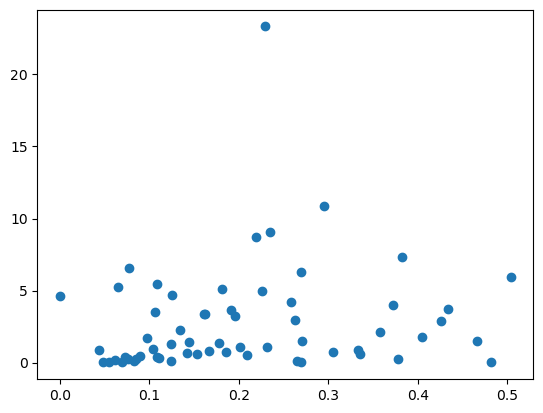

In [41]:
plt.scatter(df_pays['Prop. sous alim'], df_pays['Aide alim /hab'])

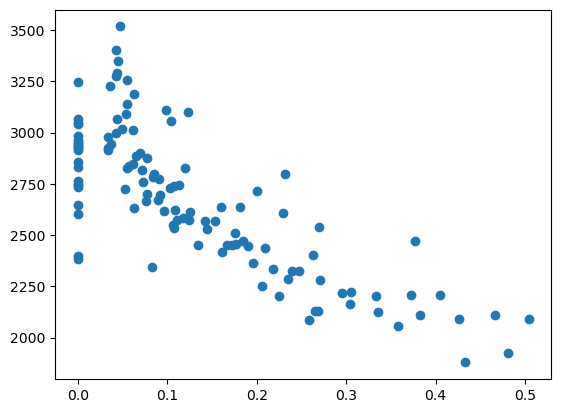

In [42]:
plt.scatter(df_pays['Prop. sous alim'], df_pays['Dispo kcal'])

In [43]:
### clustering 
### ressource youtube -> https://www.youtube.com/watch?v=SE_4dLh5vXY&list=PLnZgp6epRBbRwGBLnM8GEmcxuQGM0_oIk 
### cours 1, 2 et 4 à voir afin d'avoir une bonne méthode du clustering en utilisant l'algo CAH
df_pays.fillna(0, inplace=True)
### attention ici on remplace par zero un peu dangereux !!!
df_pays.set_index('Zone', inplace=True)
### centrage et réduction des données pour annuler effet échelle de mesure
X = df_pays[['Dispo kcal','Prop. sous alim','Aide alim /hab']]
names = df_pays.index

In [44]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
                               
# Clustering hiérarchique
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

In [45]:
Z

array([[2.40000000e+01, 8.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.40000000e+01, 5.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.10000000e+01, 8.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.60000000e+01, 1.38000000e+02, 2.28683863e-03, 2.00000000e+00],
       [5.90000000e+01, 1.16000000e+02, 2.28683863e-03, 2.00000000e+00],
       [1.60000000e+01, 5.20000000e+01, 2.28683863e-03, 2.00000000e+00],
       [6.40000000e+01, 1.54000000e+02, 2.28683863e-03, 2.00000000e+00],
       [5.10000000e+01, 9.10000000e+01, 2.28683863e-03, 2.00000000e+00],
       [1.30000000e+01, 2.00000000e+01, 4.57367726e-03, 2.00000000e+00],
       [1.18000000e+02, 1.66000000e+02, 4.57367726e-03, 2.00000000e+00],
       [5.70000000e+01, 9.60000000e+01, 6.86051589e-03, 2.00000000e+00],
       [1.62000000e+02, 1.67000000e+02, 6.86051589e-03, 2.00000000e+00],
       [4.00000000e+00, 1.76000000e+02, 1.05624552e-02, 3.00000000e+00],
       [1.50000000e+02, 1.81000000e+02, 1.18827621e

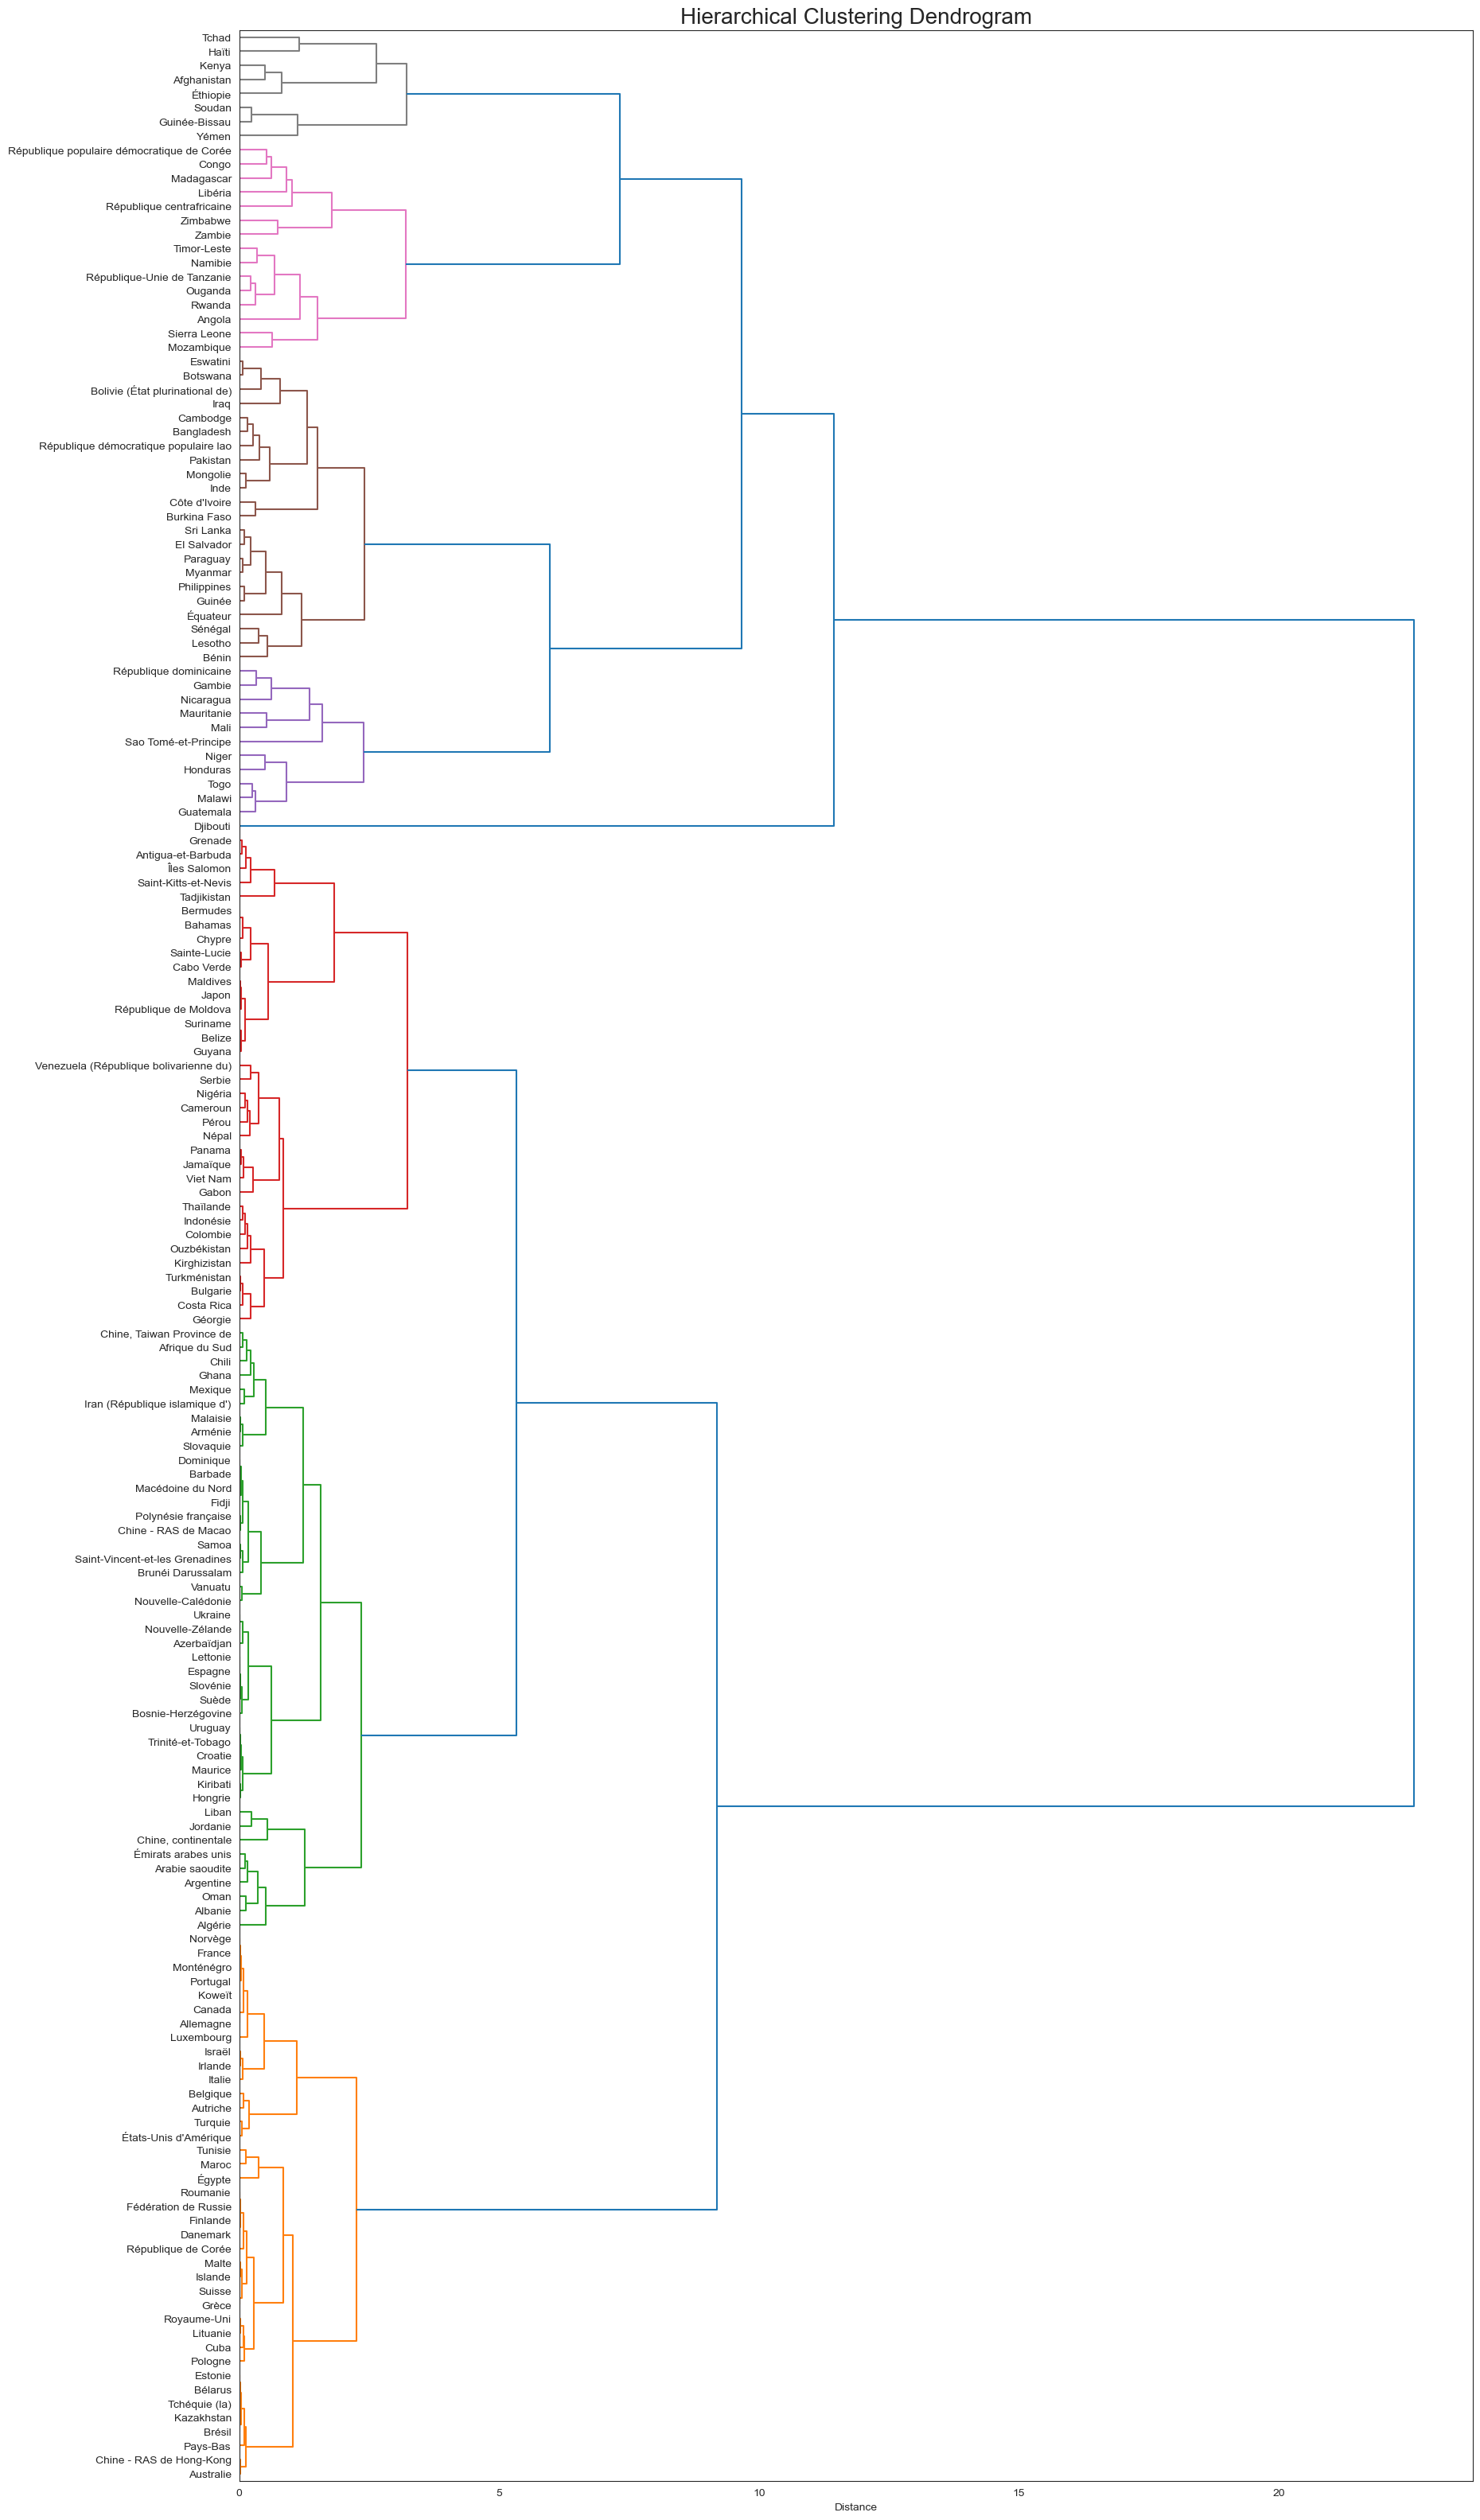

In [46]:
# Affichage du dendrogramme
fig =plt.figure(figsize=(20,40))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = names, leaf_font_size=10, color_threshold=5, orientation='right')
plt.show()

In [47]:
# Coupage du dendrogramme en 5 clusters, ici je choisis de couper avec la métrique distance égal à 8 
# ce qui correspond à la valeur de 8 sur l'axe des ordonnées
clusters = fcluster(Z, 8, criterion='distance')
cluster_pays = pd.DataFrame({"Cluster": clusters, "Zone": names})

In [48]:
cluster_pays

,Cluster,Zone
0,4,Afghanistan
1,2,Afrique du Sud
2,2,Albanie
3,2,Algérie
4,1,Allemagne
...,...,...
169,2,Venezuela (République bolivarienne du)
170,2,Viet Nam
171,4,Yémen
172,4,Zambie


In [49]:
### ajout du cluster dans le dataframe pays
df_pays=pd.merge(df_pays,cluster_pays,on="Zone")
df_pays.head()

,Zone,Population,Dispo kcal,Sous Alim,Prop. sous alim,Pays bénéficiaire,Aide Alim,Aide alim /hab,Cluster
0,Afghanistan,30552,2087.0,7.9,0.258576,Afghanistan,128238.0,4.197368,4
1,Afrique du Sud,52776,3020.0,2.6,0.049265,0,0.0,0.000000,2
2,Albanie,3173,3188.0,0.2,0.063032,0,0.0,0.000000,2
3,Algérie,39208,3293.0,1.7,0.043358,Algérie,35234.0,0.898643,2
4,Allemagne,82727,3503.0,0.0,0.000000,0,0.0,0.000000,1


<Axes: xlabel='Cluster', ylabel='Dispo kcal'>

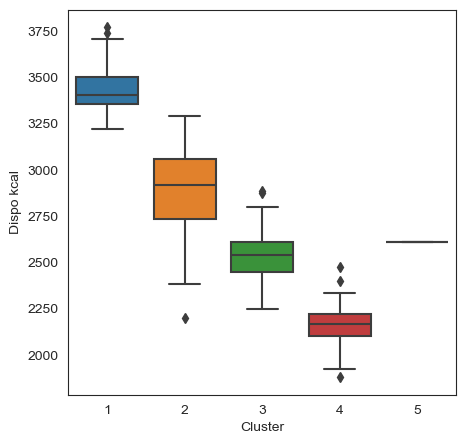

In [50]:
### réalisation de boxplot pour chaque indicateur et par cluster
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_pays, x='Cluster', y='Dispo kcal')

<Axes: xlabel='Cluster', ylabel='Prop. sous alim'>

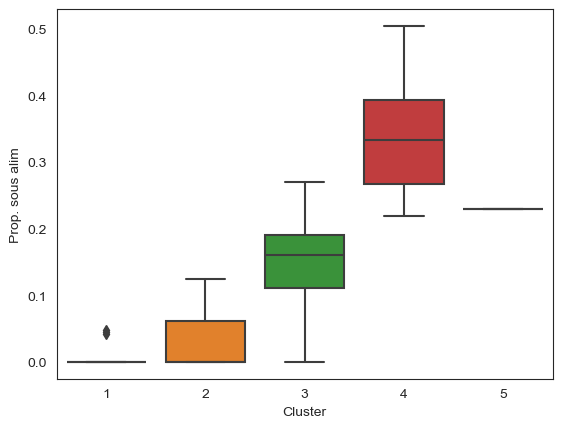

In [51]:
sns.boxplot(data=df_pays, x='Cluster', y='Prop. sous alim')

<Axes: xlabel='Cluster', ylabel='Aide alim /hab'>

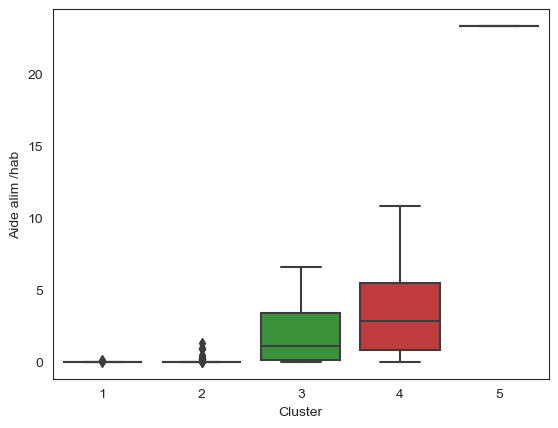

In [52]:
sns.boxplot(data=df_pays, x='Cluster', y='Aide alim /hab')

In [53]:
df_pays['Dispo kcal scaled'] = (df_pays['Dispo kcal'] - df_pays['Dispo kcal'].mean()) / df_pays['Dispo kcal'].std()

In [54]:
df_pays


,Zone,Population,Dispo kcal,Sous Alim,Prop. sous alim,Pays bénéficiaire,Aide Alim,Aide alim /hab,Cluster,Dispo kcal scaled
0,Afghanistan,30552,2087.0,7.9,0.258576,Afghanistan,128238.0,4.197368,4,-1.733835
1,Afrique du Sud,52776,3020.0,2.6,0.049265,0,0.0,0.000000,2,0.393646
2,Albanie,3173,3188.0,0.2,0.063032,0,0.0,0.000000,2,0.776729
3,Algérie,39208,3293.0,1.7,0.043358,Algérie,35234.0,0.898643,2,1.016156
4,Allemagne,82727,3503.0,0.0,0.000000,0,0.0,0.000000,1,1.495010
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (République bolivarienne du),30405,2633.0,1.9,0.062490,0,0.0,0.000000,2,-0.488814
170,Viet Nam,91680,2744.0,10.4,0.113438,0,0.0,0.000000,2,-0.235705
171,Yémen,24407,2217.0,7.2,0.294997,Yémen,264764.0,10.847872,4,-1.437401
172,Zambie,14539,1924.0,7.0,0.481464,Zambie,328.0,0.022560,4,-2.105517


In [55]:
df_pays['Dispo kcal scaled'].mean()

1.6334315764600004e-16

In [56]:
df_pays['Dispo kcal scaled'].std()

1.0000000000000002